<a href="https://colab.research.google.com/github/Peantoo/DE-Notebooks/blob/main/DE-Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from matplotlib import pyplot as plt

np.random.seed(0)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


#TODO

##Assess whether scaling or normalization makes more sense.
##Notes

###You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week. You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?



> This one should use standarization. From experience I know that this method works best when you have a dataset that should be a gaussian distribution but it has a lot of outliers, like some students having zero hours and some having 4 hours. Any time you have a possible gaussian distribution, standardizing is probably the way to go. I would probably just use the common Z-score standardization. 



###You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?


> Since there is a large gap between the averages for the two variables, this one should use normalization so that we can better see the correlation between the two instead of jumping-jacks dominating and seeming more important. Set it all between 0 and 1 so we can easily compare. Do this with a MinMaxScaler. We don't need anything like Box-Cox or Yeo-Johnson because we are comparing two different features, not one feature with overrepresentation on one end and a large variance on the other.




> I just want to note that from personal experiences, I typically wouldn't use min-max scaling for anything other than CNNs. I find that standarization has worked better in the past for basically every project I've done as it helps deal with outliers much better than simply scaling everything. Since image recognition CNNs don't deal with outliers since they are typically capped in a range of 0-255, min-max works perfectly fine for finding the global minima. 





#Scaling
###TODO

1.   Scale the usd_goal_real from 0 to 1
2.   Plot the original & scaled data together to compare
3.   Scale the goal from 0 to 1
4.   Plot the original & scaled data together to compare








In [ ]:
df2 = df.usd_goal_real
dfminmax = df.usd_goal_real.values
dfminmax = dfminmax.reshape(-1, 1)


In [ ]:
df2.describe()

In [ ]:
type(dfminmax)

numpy.ndarray

In [ ]:
#dfminmax = minmax_scaling(dfminmax, columns = [0])
#dfminmax = pd.DataFrame(dfminmax)
#dfminmax.apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [ ]:
##Try to use SKlearn MinMaxScaler
scaler1 = MinMaxScaler()
dfminmax = scaler1.fit_transform(dfminmax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


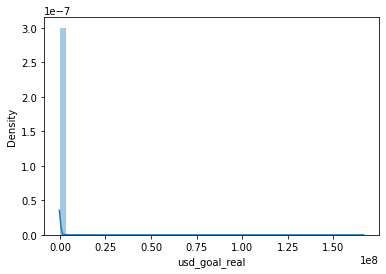

In [ ]:
sns.distplot(df2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


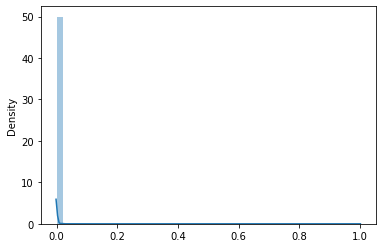

In [ ]:
sns.distplot(dfminmax) 

This doesn't seem to help that much...at least for visualization purposes. It's a different story if it's just for training, as everything is now between 0 and 1.

Notes for discussion: As is usual for most coding, I spent hours trying to figure out why the second plot wouldn't load/was taking forever to process. I tried all sorts of methods for plotting the data in different ways. The current method using SKLearn's MinMaxScaler was what I was trying when I realized I had written "sns.displot" instead of "sns.distplot." After adding the t, everything worked fine. I left a lot of the commented out code but there have been MANY iterations of me trying different minmax methods. 

#Normalization
###TODO



1.  Normalize the usd_pledged_real column with a Box-Cox
2.  Plot the original & normalzied data together to compare
3.  Normalize the pledged column with a Box-Cox
4.  Plot the original & normalzied data together to compare




#usd_pledged_real

In [ ]:
usd_real = df.usd_pledged_real

In [ ]:
#scipy.stats.boxcox(usd_real, lmbda=None) # Get ValueError: Data must be positive.

Apparently some of the "pledged real" info is negative...I could use Box-Cox, but then I'd have to eliminate some data. If my goal here was to only measure profit, that's probably fine, but that isn't stated. Since I don't like deleting negative values since it might affect the outcome, I'm going to use Numpy & SKLearn again to use Yeo-Johnson since it can handle zeros and negatives.

In [ ]:
usd_real = pd.DataFrame(df.usd_pledged_real).values #Make and Array so I can use PowerTransformer, which uses Yeo-Johnson by default. 

In [ ]:
scaler2 = PowerTransformer()

In [ ]:
usd_real = scaler2.fit_transform(usd_real)

In [ ]:
dfusd_real = pd.DataFrame(usd_real)

In [ ]:
dfusd_real.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Yeo-Johnson Normalized')

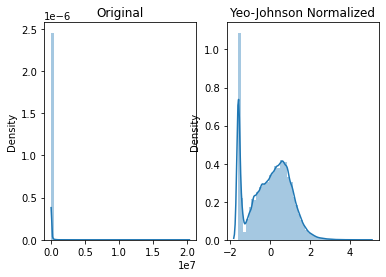

In [ ]:
original = pd.DataFrame(df.usd_pledged_real)
fig, ax=plt.subplots(1,2)
sns.distplot(original, ax=ax[0])
ax[0].set_title("Original")
sns.distplot(dfusd_real, ax=ax[1])
ax[1].set_title("Yeo-Johnson Normalized")

#Pledged

In [ ]:
pledged = pd.DataFrame(df.pledged)


In [ ]:
#dfbox = np.reshape(df.usd_pledged_real.values, (-1,1))
pledged = scaler2.fit_transform(pledged)
pledgedminmax = scaler1.fit_transform(pledged)

In [ ]:
pledged

In [ ]:
pledged2 = pd.DataFrame(pledged)
pledged2.describe()

Mean & std are both 0, that's good. Interestingly, the min is just under zero, but the max is now 4.78. That's not bad.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Yeo-Johnson Normalized')

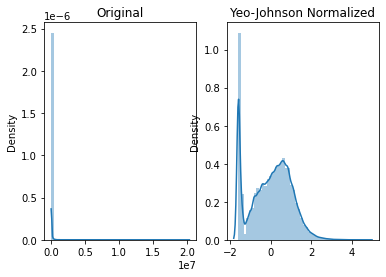

In [ ]:
original2 = pd.DataFrame(df.pledged)
fig, ax=plt.subplots(1,2)
sns.distplot(original2, ax=ax[0])
ax[0].set_title("Original")
sns.distplot(pledged2, ax=ax[1])
ax[1].set_title("Yeo-Johnson Normalized")

Looks much better, but it's probably worth looking into what exactly the negative values are all about and whether I should get rid of them and use Box-Cox instead. Honestly, I'm fairly sure it will just end up looking similar but with a small initial spike, since it seems to have turned into a decent Gaussian Distribution.

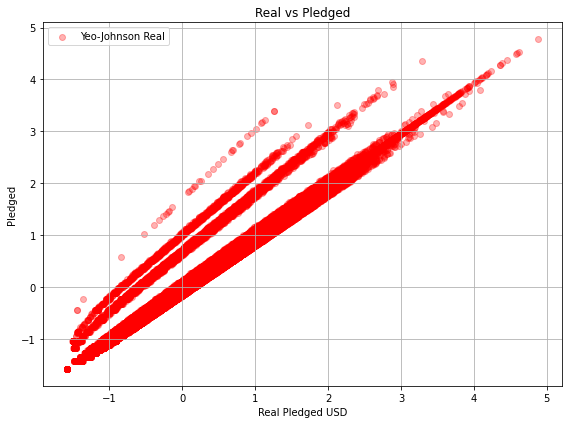

In [ ]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(dfusd_real, pledged2, color='red',
            label='Yeo-Johnson Real', alpha=0.3)

    #plt.scatter(df_minmax[:,0], df_minmax[:,1],
            #color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Real vs Pledged')
    plt.xlabel('Real Pledged USD')
    plt.ylabel('Pledged')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

I expected all of these to be on the same line, as the Usd real value shouldn't be much different from the Pledged value. I'd need to find places where the value isn't the same and look at them.

In [ ]:
dfrealpledged = pd.DataFrame(df.usd_pledged_real)
dfpledged = pd.DataFrame(df.pledged)
dfconcat = dfrealpledged.append(dfpledged, ignore_index=False)

In [ ]:
#concat the two, run boolean
dfcompare = dfconcat[df['usd_pledged_real'] != df['pledged']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
dfcompare

,usd_pledged_real,pledged
14,121857.33,NaN
21,0.81,NaN
23,6.29,NaN
27,42174.03,NaN
28,160.60,NaN
...,...,...
378636,NaN,5435.0
378642,NaN,1246.0
378645,NaN,2738.0
378651,NaN,5501.0


I'm not entirely sure what to make of this and it's time to call it quits. I'll probably dig into this even more on my off hours, just out of curiosity.